# **Capitulo 5 – Decision Trees. End to End**

### Librerias

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

Los tamaños de fuente por defecto para que las figuras queden más bonitas:

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Y creemos la carpeta `images/decision_trees` (si no existe ya), y definamos la función `save_fig()` que se utiliza a través de este Notebook para guardar las figuras:

In [3]:
from pathlib import Path
# Esta es otra forma de crear directorios 
# IMAGES_PATH es un objeto que permite hacer llamadas al sistema
# como por ejemplo, crear un directorio
IMAGES_PATH = Path() / "images" / "regression_trees"
# parents: crear directorios superiores o no
# exist_ok: qué pasa si ya existe
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Cargamos datos

In [15]:
import pandas as pd
penguins = pd.read_csv("data/penguins_pre.csv")

# Creamos train/test

In [31]:
X = penguins.drop(["body_mass_g"], axis=1)
y = penguins["body_mass_g"]


In [32]:
# Hacer una función con todo y probar diversos arboles StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, X["species"]):
    train_set = X.iloc[train_index]
    train_y_set = y.iloc[train_index]
    test_set = X.iloc[test_index]
    test_y_set = y.iloc[test_index]

# Arbol de regresión

In [33]:
from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(train_set, train_y_set)

DecisionTreeRegressor(max_depth=2, random_state=42)

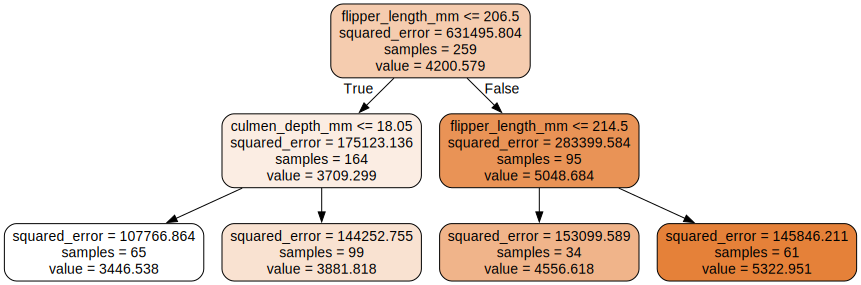

In [34]:
from sklearn.tree import export_graphviz
from graphviz import Source
export_graphviz(
    tree_reg,
    out_file=str(IMAGES_PATH / "regression_tree.dot"),
    feature_names=train_set.columns,
    rounded=True,
    filled=True
)
Source.from_file(IMAGES_PATH / "regression_tree.dot")

In [ ]:
# COmprobar que se cumplen las samples para cada nodo y hoja

In [35]:
# value es la media. Comprobar

4200.57915057915

In [47]:
# squared_error: es el MSE (mean squared error) en esa casilla usando como predicción la media de la sample de ese nodo/hoja


{3446.5384615384614, 3881.818181818182, 4556.617647058823, 5322.950819672131}

In [ ]:
# Solo hay 4 predicciones distintas. Una para cada hoja.
# Comprobar. Pista: usar set

In [50]:
# Debería haber tantas repeticiones de cada predicción como samples en dicho nodo

In [51]:
# Hacer predicciones
# Comprobar error
# Comprobar que solo existen 4 resultados

array([3881.81818182, 3881.81818182, 3446.53846154, 4556.61764706,
       5322.95081967, 3446.53846154, 3881.81818182, 3881.81818182,
       3446.53846154, 4556.61764706, 3446.53846154, 3446.53846154,
       3881.81818182, 3446.53846154, 3446.53846154, 5322.95081967,
       4556.61764706, 3881.81818182, 3446.53846154, 4556.61764706,
       3446.53846154, 3446.53846154, 3446.53846154, 3446.53846154,
       4556.61764706, 3881.81818182, 3446.53846154, 3446.53846154,
       5322.95081967, 5322.95081967, 3446.53846154, 3881.81818182,
       4556.61764706, 3881.81818182, 5322.95081967, 4556.61764706,
       4556.61764706, 3881.81818182, 3881.81818182, 3446.53846154,
       3881.81818182, 3446.53846154, 3446.53846154, 3881.81818182,
       3881.81818182, 4556.61764706, 5322.95081967, 5322.95081967,
       3446.53846154, 3881.81818182, 5322.95081967, 3881.81818182,
       4556.61764706, 3881.81818182, 4556.61764706, 4556.61764706,
       3446.53846154, 5322.95081967, 3881.81818182, 3446.53846

# Random Search
### Investigar parámetros y hacer random search con CV

In [53]:
from sklearn.model_selection import RandomizedSearchCV
tree_reg = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [1, 5, 10, 15, 20]
}

random_search = RandomizedSearchCV(tree_reg, # El modelo que quiero entrenar
                                   param_grid, # El grid de parámetros
                                   random_state=42, # Semilla
                                   n_iter=10, # Nº de iteraciones del random search
                                   cv=5, # Folds del cross validation
                                   # ¿Por qué negativo?
                                   scoring="neg_mean_squared_error", # Métrica que quiero optimizar
                                   n_jobs = -1 # Paralelizar
                                  )

random_search.fit(train_set, train_y_set)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'min_samples_leaf': [1, 5, 10, 15, 20]},
                   random_state=42, scoring='neg_mean_squared_error')

{'min_samples_leaf': 10, 'max_depth': 4}